Working with our data without knowing it isn't a  good habit, if the data is complix enough we eventually will reduce dimension and pick feature.
It's better to know our data now.

We will produce two versions of data, one without feature selection and the other with feature selection based on correlations

We will try to predict income and that will be our Y

We can also preprocess the data using Kubeflow but let's have some fun coding our own preprocess class

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load configrations

In [2]:
from Utils import load_config_file
config_file  = load_config_file("../config.yaml")

In [3]:
raw_data_path = "../"+config_file["paths"]["raw_data"]
raw_data_path

'../Data/Raw_data/income_threshold.csv'

# Loading the data

In [4]:
raw_data = pd.read_csv(raw_data_path)

# Exploring the data

In [5]:
raw_data.head()

,age,workclass,fnlwgt,education,education.num,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


I actually don't know what is fnlwgt means but will figure it out.

It also seems that they bucktized income which will make it easier for us to encode it.

I don't think that bucktizing hoursPerWeek will be benifical.

In [6]:
raw_data.describe()

,age,fnlwgt,education.num,capitalGain,capitalLoss,hoursPerWeek
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


After viewing the data it's a littile weird to find someone working at the age of 90. Maybe it's better to view it more in detail

In [7]:
age_90_data = raw_data[raw_data['age']==90]
age_90_data.describe()

,age,fnlwgt,education.num,capitalGain,capitalLoss,hoursPerWeek
count,35.0,35.000000,35.000000,35.000000,35.000000,35.000000
mean,90.0,153637.400000,10.171429,2337.828571,63.028571,40.114286
std,0.0,89149.176322,2.955411,5319.898990,372.882057,16.091231
min,90.0,40388.000000,4.000000,0.000000,0.000000,10.000000
25%,90.0,83590.500000,9.000000,0.000000,0.000000,36.000000
50%,90.0,141758.000000,10.000000,0.000000,0.000000,40.000000
75%,90.0,218213.000000,13.000000,0.000000,0.000000,40.000000
max,90.0,313986.000000,15.000000,20051.000000,2206.000000,99.000000


I still find it weird, can be treated as anomaly

OK, Let's find the correlations, we might do some feature select

In [8]:
corr = raw_data.corr()
corr

,age,fnlwgt,education.num,capitalGain,capitalLoss,hoursPerWeek
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capitalGain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capitalLoss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hoursPerWeek,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


<AxesSubplot: >

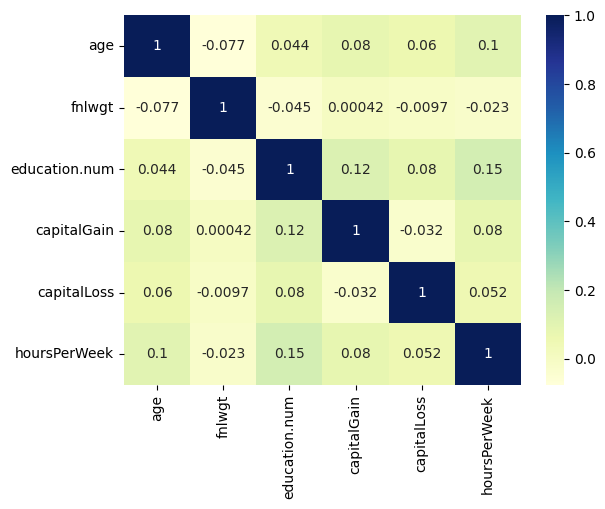

In [9]:
sns.heatmap(corr, cmap="YlGnBu", annot=True)

There's a big correlation between age and hoursperweek "0.1" as well ass education.num and hoursperweek "0.15", and capitalgain and education.num  "0.12"

We will exclude hoursperweek and capitalGain, as well as "education category"

# Preprocess the data

In [10]:
from Utils.data import process_data, y_encoder

## Preprocess the full feature data first

### Preprocess Features X

In [11]:
X_full_feature,Y_full_feature = process_data(raw_data,"income").get_preprocessed_data()


In [12]:
X_full_feature.head()

,age,fnlwgt,education,education.num,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,0,...,3,4,5,0,1,2,3,4,0,1
0,0.739726,0.107603,5,0.200000,4,0.0,0.000000,0.500000,38,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.465753,0.140217,7,0.733333,9,0.0,0.000000,0.397959,38,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.780822,0.115526,0,0.333333,7,0.0,0.000000,0.051020,38,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.383562,0.118382,11,0.533333,4,0.0,0.518365,0.438776,38,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.246575,0.057528,1,0.400000,4,0.0,0.000000,0.397959,38,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Preprocess our Y labels

In [13]:
Y_full_feature.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,>50K
4,<=50K


In [14]:
Y_full_feature.describe()

,income
count,30162
unique,2
top,<=50K
freq,22654


It has two unique values so we are excepecting 2 values

In [15]:
len(X_full_feature),len(Y_full_feature)

(30162, 30162)

In [16]:
is_onehot_encoding = config_file["preprocess"]["one_hot_encoding"]

In [17]:
Y_full_feature = y_encoder(Y_full_feature,one_hot_encode=is_onehot_encoding).get_preprocessed_data()
Y_full_feature

,0
0,0
1,0
2,0
3,1
4,0
...,...
30157,0
30158,0
30159,1
30160,0


## preprocess the future selected data

We will exclude hoursperweek and capitalGain, as well as "education category"

In [18]:
feature_selected_data = raw_data.drop(["capitalGain","education"],axis=1)

In [19]:
feature_selected_data.head()

,age,workclass,fnlwgt,education.num,maritalStatus,occupation,relationship,race,sex,capitalLoss,hoursPerWeek,nativeCountry,income
0,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,4356,18,United-States,<=50K
1,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,3900,40,United-States,<=50K
2,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,3900,40,United-States,<=50K
3,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,3770,45,United-States,<=50K
4,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,3770,40,United-States,<=50K


In [20]:
X_selected_feature,Y_selected_feature = process_data(feature_selected_data,"income").get_preprocessed_data()

In [21]:
X_selected_feature.head()

,age,fnlwgt,education.num,occupation,capitalLoss,hoursPerWeek,nativeCountry,0,1,2,...,3,4,5,0,1,2,3,4,0,1
0,0.095890,0.160181,0.800000,0,0.0,0.091837,38,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.301370,0.224148,0.800000,9,0.0,0.500000,23,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.068493,0.205145,0.600000,0,0.0,0.295918,5,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.260274,0.067129,0.466667,7,0.0,0.397959,25,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.479452,0.200549,0.600000,3,0.0,0.397959,38,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [22]:
Y_full_feature.describe()

,0
count,30162.000000
mean,0.248922
std,0.432396
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [23]:
Y_selected_feature = y_encoder(Y_selected_feature,one_hot_encode=is_onehot_encoding).get_preprocessed_data()

In [24]:
Y_selected_feature.describe()

,0
count,30162.000000
mean,0.248922
std,0.432396
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [25]:
Y_full_feature.head()

,0
0,0
1,0
2,0
3,1
4,0


In [26]:
Y_selected_feature.head()

,0
0,0
1,1
2,0
3,0
4,0


# Saving the data to csv file

We will save it in Prep_data folder

Loading the names from config file to ensure we have consistincy if any changed happened, we never know what we will decide to change

In [27]:
saved_files_names_full = config_file["prep_data_names"]["full_feature"]
saved_files_names_selected = config_file["prep_data_names"]["selected_feature"]

In [28]:
prep_path = "Prep_data/"

In [29]:
import os
sub_folders_names = []
for sub_fold in config_file["prep_data_names"]:
    sub_folders_names.append(sub_fold)
    print(sub_fold)
    if not os.path.exists(prep_path+sub_fold):
        os.makedirs(prep_path+sub_fold)

full_feature
selected_feature


In [30]:
def split_train_test_save(data: tuple,sub_folders_name,train_ratio=0.8):
    x, y = data
    spl = int(train_ratio * len(y))
    x_train = x.iloc[:spl,:]
    y_train = y.iloc[:spl,:]
    x_test = x.iloc[spl:,:]
    y_test = y.iloc[spl:,:]
    print(f"x_train: {len(x_train)}, x_test: {len(x_test)} ")
    x_train.to_csv(f"{sub_folders_name}/x_train.csv",index=False)
    y_train.to_csv(f"{sub_folders_name}/y_train.csv",index=False)

    x_test.to_csv(f"{sub_folders_name}/x_test.csv",index=False)
    y_test.to_csv(f"{sub_folders_name}/y_test.csv",index=False)

In [31]:
split_train_test_save((X_full_feature,Y_full_feature),prep_path+"full_feature")
split_train_test_save((X_selected_feature,Y_selected_feature),prep_path+"selected_feature")


x_train: 24129, x_test: 6033 
x_train: 24129, x_test: 6033 
